# Predicting NFL Games

##### by Oluwadurotimi Sanni

## Introduction

Football, that is American Football, is one of the most popular sports in the world. You can find fans of the sport all over the world, and even leagues of teams. You can find [teams](https://insider.afca.com/american-football-continues-global-international-growth/) in Austria, Cananda, Brazil, Japan, Mexico, Australia, and Germany. As you can see, there are many leagues across the world. However, the league that represents the peak of football is the [National Football League](https://en.wikipedia.org/wiki/National_Football_League), or as most people know it, the NFL. 

In football, like any other sport, you win or lose. In the NFL, winning is everything. All 32 teams share a common goal: to win the Super Bowl.  The Super Bowl is essentially the NFL's championship game. It has become almost like a holiday in the United States. The day of the Super Bowl, which is on a Sunday in February, the nation pauses to watch one game. People gather anywhere and everywhere, with their eyes glued to the TV. An estimated 96.4 million people watched the Super Bowl in February 2021. In short, the Super Bowl is a very big deal, especially in the United States. To reach the Super Bowl, 12-14 teams (the [format changed](https://www.sportingnews.com/ca/nfl/news/nfl-playoff-bracket-format-explained/7h99ce2e8u7r1jyc0pcku3be7) to 14 teams starting this season) compete in a single-elimination playoff. These 14 teams and the playoff matchups are decided by a 16-game regular season. My goal for this tutorial is to try and predict future NFL games, based off the outcomes of previous games. If we can find characteristics that define winning teams for a given season, we can talk about how teams can start winning games, and eventually, win a Super Bowl.

In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

## Understanding the Data 

In [208]:
game_data = pd.read_csv("nfl_team_stats_2002-2020.csv")
pd.set_option('display.max_columns', None)
game_data.head()

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,rushing_yards_home,total_yards_away,total_yards_home,comp_att_away,comp_att_home,sacks_away,sacks_home,rushing_attempts_away,rushing_attempts_home,fumbles_away,fumbles_home,int_away,int_home,turnovers_away,turnovers_home,penalties_away,penalties_home,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,318,113,43,279,361,16-26,28-45,0-0,3-24,25,22,0,0,1,3,1,3,5-29,10-80,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,242,73,142,266,384,24-30,26-39,3-17,4-29,14,32,1,1,0,2,1,3,10-90,10-82,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,288,140,80,368,368,16-28,20-33,1-6,1-9,33,26,1,1,2,1,3,2,8-52,4-33,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,167,241,36,401,203,15-19,18-31,1-0,4-31,45,13,0,0,0,1,0,1,4-39,9-57,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,352,194,59,470,411,20-29,28-40,0-0,1-7,30,20,0,1,1,0,1,1,9-87,4-38,0-10,0-10,20,17,0,0,30:16,29:44,40,39


Football is one of the more complicated sports you'll see. Compared to other popular sports like soccer and basketball, it is difficult to understand. If you don't understand football, I suggest quickly reading [this](https://www.liveabout.com/football-101-the-basics-of-football-1333784) before continuing.

Ok, now let's talk about the data I will be using. This data, from Kaggle, contains team statistics from each playoff and regular season game between 2002-2020.

There are 39 columns in this dataset:

For columns listed with (home and away), they actually represent two separate columns for each team. (Ex. first_downs (home and away) represents the columns first_downs_home and first_downs_away)

- date: date of the game
- away: name of the away team
- home: name of the home team
- first_downs (home and away): total number of first downs
- third_downs (home and away): (third downs resulting in first downs) - (total number of third downs)
- fourth_downs (home and away): (fourth downs resulting in first downs) -  (total number of first down attempts on fourth down)
- passing_yards (home and away): total number of passing yards
- rushing_yards (home and away): total number of rushing yards
- total_yards (home and away): total number of yards
- comp_att (home and away): (total number of pass completions) - (total number of passes thrown)
- sacks (home and away): (number of times quarterback is tackled behind the line of scrimmage on a pass) - (total number of yards lost by the offense on sacks)
- rushing_attempts (home and away): total number of rushing attempts
- fumbles (home and away): number of offensive plays that result in the defense taking the ball due to a fumble
- int (home and away): number of passing attempts that result in the defense catching the ball
- turnovers (home and away): number of offensive plays that result in the defense having the ball (fumbles + int)
- penalties (home and away): (number of penalties) - (total number of yards given up due to penalties)
- redzone (home and away): (number of scores when 20 yards or less from scoring) - (total number of times 20 yards of less from scoring)
- drives (home and away): number of offensive possessions
- def_st_td (home and away): number of touchdowns scored by defense and special teams
- possession (home and away): total amount of game time on offense
- score (home and away): total points scored

### Tidying the Data

Now that all the data has been explained, let's look at how we can clean it up. Before we do anything, let's remove any games that resulted in a tie. They won't help us predict NFL wins. Now, first, let's look at some of the overlapping data. As explained earlier, turnovers are just the addition of fumbles and interceptions. Therefore, we can remove the columns for fumbles and interceptions.

In [209]:
game_data = game_data[game_data['score_home'] != game_data['score_away']]
game_data = game_data.drop(columns = ['fumbles_home', 'fumbles_away', 'int_home', 'int_away'])

Second, we can combine some of these columns, to create more telling statistics. For example, a team passing more times than another team and having more passing yards will not tell us much. However, we can create a column for passing yards per attempt, it will tell us much more about the quality of that team's passing. The same thing applies to rushing as well. Once we create these new columns, we will no longer need passing yards or rushing yards and attempts. We will also create a column for yards per attempt regardless if the yards are passing or rushing. Last, we can look at combining the columns for drives and possession. The length of each drive tells us more about the quality of the offense. Therefore, we will also create a column of possession per drive.

In [210]:
#New columns created (temporarily)
#Splits string and extracts passing attempts from comp_att column
game_data['pass_att_home'] = (game_data['comp_att_home'].str.split('-', 1).str[1]).astype(int)
game_data['pass_att_away'] = (game_data['comp_att_away'].str.split('-', 1).str[1]).astype(int)

game_data['pass_yards_att_home'] = game_data['passing_yards_home'] / game_data['pass_att_home']
game_data['pass_yards_att_away'] = game_data['passing_yards_away'] / game_data['pass_att_away']
game_data['rush_yards_att_home'] = game_data['rushing_yards_home'] / game_data['rushing_attempts_home']
game_data['rush_yards_att_away'] = game_data['rushing_yards_away'] / game_data['rushing_attempts_away']
game_data['total_yards_att_home'] = game_data['total_yards_home'] / (game_data['pass_att_home'] + game_data['rushing_attempts_home'])
game_data['total_yards_att_away'] = game_data['total_yards_away'] / (game_data['pass_att_away'] + game_data['rushing_attempts_away'])
game_data = game_data.drop(columns = ['passing_yards_home', 'passing_yards_away',
                                      'rushing_yards_home', 'rushing_yards_away', 'rushing_attempts_home',
                                      'rushing_attempts_away', 'total_yards_home', 'total_yards_away', 
                                      'comp_att_home', 'comp_att_away', 'pass_att_home', 'pass_att_away'])

#Adjusts MM:SS to seconds
game_data['seconds_poss_home'] = (60 * (game_data['possession_home'].str.split(":",1).str[0]).astype(int)) + ((game_data['possession_home'].str.split(":",1).str[1]).astype(int))
game_data['seconds_poss_away'] = (60 * (game_data['possession_home'].str.split(":",1).str[0]).astype(int)) + ((game_data['possession_home'].str.split(":",1).str[1]).astype(int))

game_data = game_data[game_data['drives_home'] > 0]
game_data = game_data[game_data['drives_away'] > 0]
game_data['sec_drive_home'] = game_data['seconds_poss_home'] / game_data['drives_home']
game_data['sec_drive_away'] = game_data['seconds_poss_away'] / game_data['drives_away']
game_data = game_data.drop(columns = ['drives_home', 'drives_away', 'possession_home', 'possession_away',
                                     'seconds_poss_home', 'seconds_poss_away'])

Now, we have created colums for passing yards per passing attempt, rushing yards per rushing attempt, total yards per attempt, and seconds per drive. To clean up, we have eliminated the columns that are of no use to us anymore. This includes all the columns to calculate values for the columns above. Before we move on, we must look at the all the statistics/columns that are of type String. This includes third_downs, fourth_downs, and redzone. We will change these to percentages so the success rate is seen easily. However, we will remove the column redzone because the data provided does not have 'redzone conversions' for parts of the dataset, prior to 2006-07 season. We also must look at sacks and penalties. For these we will adjust them to only include the total yards resulting from sacks and penalties, respectively.

In [211]:
# Ex. 5-13 -> 5
game_data['third_comp_home'] = (game_data['third_downs_home'].str.split('-', 1).str[0]).astype(int)
game_data['third_comp_away'] = (game_data['third_downs_away'].str.split('-', 1).str[0]).astype(int)
game_data['fourth_comp_home'] = (game_data['fourth_downs_home'].str.split('-', 1).str[0]).astype(int)
game_data['fourth_comp_away'] = (game_data['fourth_downs_away'].str.split('-', 1).str[0]).astype(int)

# Ex. 5-13 -> 13
game_data['third_att_home'] = (game_data['third_downs_home'].str.split('-', 1).str[1]).astype(int)
game_data['third_att_away'] = (game_data['third_downs_away'].str.split('-', 1).str[1]).astype(int)
game_data['fourth_att_home'] = (game_data['fourth_downs_home'].str.split('-', 1).str[1]).astype(int)
game_data['fourth_att_away'] = (game_data['fourth_downs_away'].str.split('-', 1).str[1]).astype(int)

# Now we are calculating for example, 5/13
game_data['3down_percent_home'] = np.where(game_data['third_att_home'] == 0, 0.0, 
                                           game_data['third_comp_home'] / game_data['third_att_home'])
game_data['3down_percent_away'] = np.where(game_data['third_att_away'] == 0, 0.0, 
                                           game_data['third_comp_away'] / game_data['third_att_away'])
game_data['4down_percent_home'] = np.where(game_data['fourth_att_home'] == 0, 0.0, 
                                           game_data['fourth_comp_home'] / game_data['fourth_att_home'])
game_data['4down_percent_away'] = np.where(game_data['fourth_att_away'] == 0, 0.0, 
                                           game_data['fourth_comp_away'] / game_data['fourth_att_away'])

game_data['sack_yards_home'] = (game_data['sacks_home'].str.split("-",1).str[1]).astype(int)
game_data['sack_yards_away'] = (game_data['sacks_away'].str.split("-",1).str[1]).astype(int)
game_data['penalty_yards_home'] = (game_data['penalties_home'].str.split("-",1).str[1]).astype(int)
game_data['penalty_yards_away'] = (game_data['penalties_away'].str.split("-",1).str[1]).astype(int)

game_data = game_data.drop(columns = ['sacks_home', 'sacks_away', 'penalties_home', 
                                      'penalties_away', 'third_downs_home','third_downs_away',
                                     'fourth_downs_home', 'fourth_downs_away',
                                     'redzone_home', 'redzone_away', 'third_att_home',
                                     'third_att_away', 'fourth_att_home', 'fourth_att_away',
                                     'third_comp_home', 'third_comp_away', 'fourth_comp_home',
                                     'fourth_comp_away'])

game_data.head()

,date,away,home,first_downs_away,first_downs_home,turnovers_away,turnovers_home,def_st_td_away,def_st_td_home,score_away,score_home,pass_yards_att_home,pass_yards_att_away,rush_yards_att_home,rush_yards_att_away,total_yards_att_home,total_yards_att_away,sec_drive_home,sec_drive_away,3down_percent_home,3down_percent_away,4down_percent_home,4down_percent_away,sack_yards_home,sack_yards_away,penalty_yards_home,penalty_yards_away
0,2002-09-05,49ers,Giants,13,21,1,3,0,0,16,13,7.066667,6.384615,1.954545,4.520000,5.388060,5.470588,129.866667,149.846154,0.562500,0.333333,0.0,0.0,24,0,80,29
1,2002-09-08,Jets,Bills,18,26,1,3,2,0,37,31,6.205128,6.433333,4.437500,5.214286,5.408451,6.045455,130.444444,138.117647,0.411765,0.250000,1.0,0.0,29,17,82,90
2,2002-09-08,Vikings,Bears,19,20,3,2,0,0,23,27,8.727273,8.142857,3.076923,4.242424,6.237288,6.032787,100.529412,100.529412,0.538462,0.384615,0.0,0.0,9,6,33,52
3,2002-09-08,Chargers,Bengals,27,13,0,1,0,0,34,6,5.387097,8.421053,2.769231,5.355556,4.613636,6.265625,88.800000,121.090909,0.363636,0.600000,0.0,0.0,31,0,57,39
4,2002-09-08,Chiefs,Browns,24,24,1,1,0,0,40,39,8.800000,9.517241,2.950000,6.466667,6.850000,7.966102,104.941176,89.200000,0.363636,0.454545,0.0,0.0,7,0,38,87


## Analyzing the Data

Now that we have a table full of usable data columns, we can start evaluating our data. We want to know as much about our data as possible. The endgoal is predicting NFL wins. Let's look at some offensive trends first. For this, I will not include any games with defensive or special teams touchdowns, so the score reflects the productivity of the offense that day. 

<AxesSubplot:xlabel='score_away', ylabel='total_yards_att_away'>

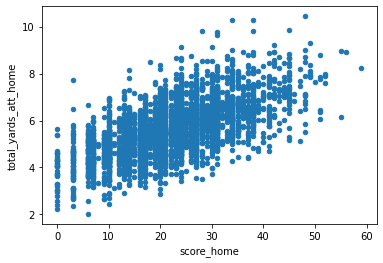

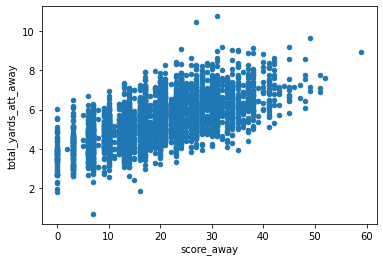

In [212]:
offense_data = game_data[game_data['def_st_td_away'] + game_data['def_st_td_home'] == 0]
offense_data.plot.scatter(x='score_home', y='total_yards_att_home')
offense_data.plot.scatter(x='score_away', y='total_yards_att_away')

Here is our first scatterplot. As the plot show, there seems to be a positive relationship between an increase in yards per attempt (or play), and a higher amount of points. It appears for both home and away teams. Therefore, we can say a higher yards per attempt will increase our chances of winning. But what if we look at passing yards per attempt and rushing yards per attempt individually?

<AxesSubplot:xlabel='score_away', ylabel='rush_yards_att_away'>

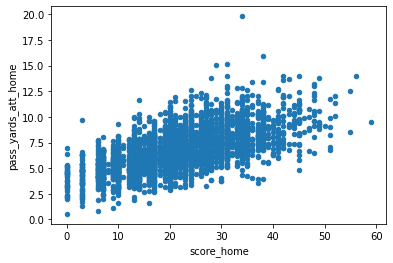

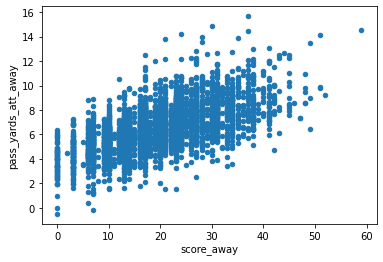

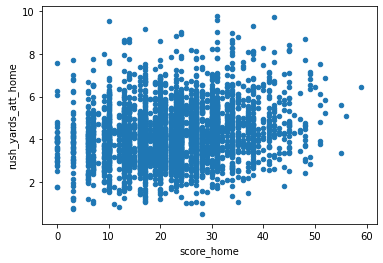

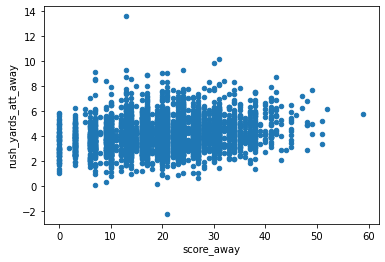

In [213]:
offense_data.plot.scatter(x='score_home', y='pass_yards_att_home')
offense_data.plot.scatter(x='score_away', y='pass_yards_att_away')
offense_data.plot.scatter(x='score_home', y='rush_yards_att_home')
offense_data.plot.scatter(x='score_away', y='rush_yards_att_away')

Here are the some more scatterplots. Notice the differences in rushing scatterplots versus the passing scatterplots. For the passing scatterplots, there is a clear positive relationship in terms of scoring more points and more success passing (higher passing yards per attempt). However, when looking at the rushing scatterplot, that positive correlation is nonexistent. The variance is fairly constant, which mean there is no relationship between scoring more points and having more success rushing.

This is an important note to keep in mind, but our main focus is winning. Scoring points does not necessarily mean winning. You still must outscore the other team, by preventing them from scoring. Defense. Before we look at defense, let's create two more columns for win/loss. I will create a column that will either be 1 for a win, or 0 for a loss. Home and away teams will have separate columns for which this value will be assigned.

In [214]:
game_data['win_home'] = np.where(game_data['score_home'] > game_data['score_away'], 1, 0)
game_data['win_away'] = np.where(game_data['score_away'] > game_data['score_home'], 1, 0)

Now, we can look at how defense impacts winning. Now that we have seen how much the value of passing versus rushing can vary on offense, let's immediately look at them individually for defense. To evaluate defense, we can look at how one team's offense impacts the other team's chances of winning. We will create two separate dataframes, so we can look at how statistics differ in wins versus losses.

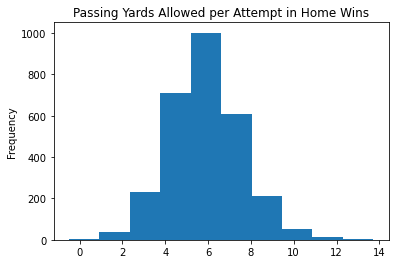

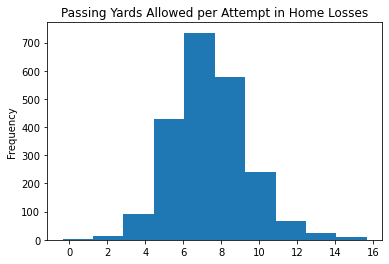

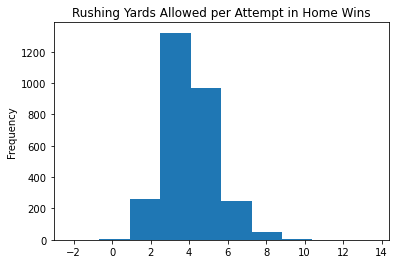

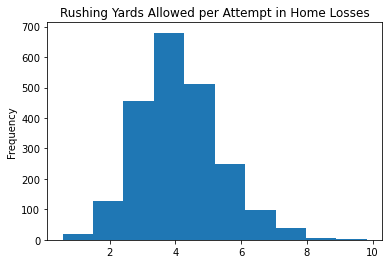

In [215]:
home_win = game_data[game_data['win_home'] == 1]
home_loss = game_data[game_data['win_home'] == 0]

home_win.plot(y = 'pass_yards_att_away', kind = 'hist', legend = None)
plt.title('Passing Yards Allowed per Attempt in Home Wins')
plt.show()

home_loss.plot(y = 'pass_yards_att_away', kind = 'hist', legend = None)
plt.title('Passing Yards Allowed per Attempt in Home Losses')
plt.show()

home_win.plot(y = 'rush_yards_att_away', kind = 'hist', legend = None)
plt.title('Rushing Yards Allowed per Attempt in Home Wins')
plt.show()

home_loss.plot(y = 'rush_yards_att_away', kind = 'hist', legend = None)
plt.title('Rushing Yards Allowed per Attempt in Home Losses')
plt.show()

Here, we have histograms showing the difference in passing and rushing defense for home teams, depending on if they win or lose. We can see passing yards allowed per attempt increases significantly from a win to a loss. However, this same trend does not show itself with rushing yards. The peak of its histogram does not shift to the right as with the histogram for passing defense. I am now confident that passing offense and defense has much more importance in terms of success. We will test this later. I want to look at a couple more statistics before we move on to hypothesis testing and machine learning.

There a few statistics that I am still interested in plotting before we move on: third down percentage and penalty yards. For each statistic, we will have to look at both offense and defense. In this case, we will look at home teams again.

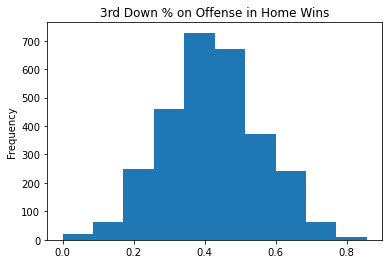

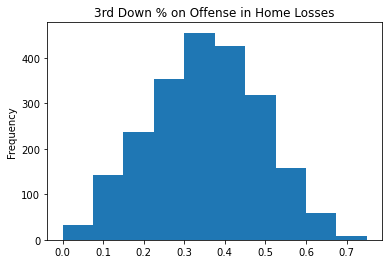

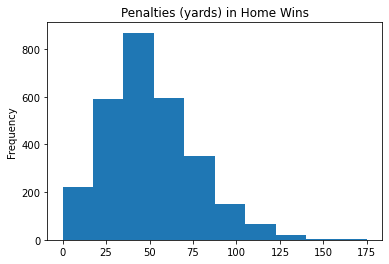

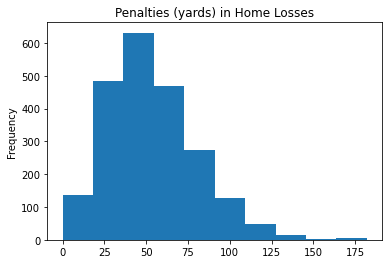

In [216]:
home_win.plot(y = '3down_percent_home', kind = 'hist', legend = None)
plt.title('3rd Down % on Offense in Home Wins')
plt.show()

home_loss.plot(y = '3down_percent_home', kind = 'hist', legend = None)
plt.title('3rd Down % on Offense in Home Losses')
plt.show()

home_win.plot(y = 'penalty_yards_home', kind = 'hist', legend = None)
plt.title('Penalties (yards) in Home Wins')
plt.show()

home_loss.plot(y = 'penalty_yards_home', kind = 'hist', legend = None)
plt.title('Penalties (yards) in Home Losses')
plt.show()

Here are few more histograms. Let's look at the difference between the first two histograms. We can see that there is a significant difference between home teams in wins and losses in terms of success on third down. Winning teams are more successgful The same cannot be said for penalties. The histogram shows a very similar expected penalty yards for home teams in wins and losses. But what can we still win if our team has more penalty yards.

We're almost done analyzing data. Before we move on, let's look at some of our statistics in a different light. Let's compare home and away team's statistics. This will bring some form of standardization to our data. Feel free to compare whatever statistics you want, but for this tutorial, we will only look at penalty yards and passing yards per attempt.

/var/folders/z8/_17c_6_d0q7dzf8zhz4grdmc0000gn/T/ipykernel_13860/1733740876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_win['pen_yards_diff'] = home_win['penalty_yards_home'] - home_win['penalty_yards_away']
/var/folders/z8/_17c_6_d0q7dzf8zhz4grdmc0000gn/T/ipykernel_13860/1733740876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_win['pass_yards_att_diff'] = home_win['pass_yards_att_home'] - home_win['pass_yards_att_away']
/var/folders/z8/_17c_6_d0q7dzf8zhz4grdmc0000gn/T/ipykernel_1386

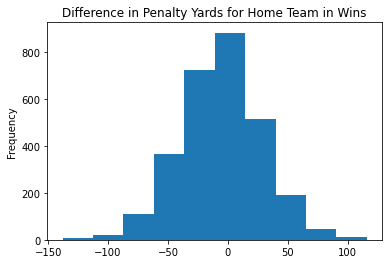

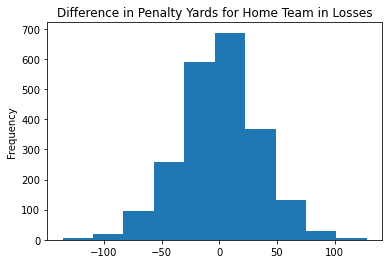

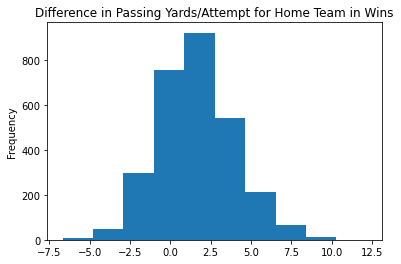

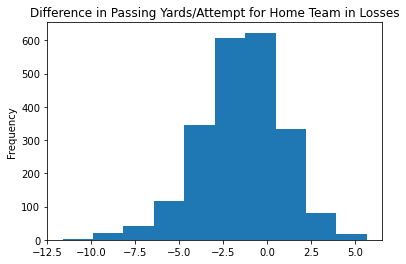

In [217]:
home_win['pen_yards_diff'] = home_win['penalty_yards_home'] - home_win['penalty_yards_away']
home_win['pass_yards_att_diff'] = home_win['pass_yards_att_home'] - home_win['pass_yards_att_away']
home_loss['pen_yards_diff'] = home_loss['penalty_yards_home'] - home_loss['penalty_yards_away']
home_loss['pass_yards_att_diff'] = home_loss['pass_yards_att_home'] - home_loss['pass_yards_att_away']

home_win.plot(y = 'pen_yards_diff', kind = 'hist', legend = None)
plt.title('Difference in Penalty Yards for Home Team in Wins')
plt.show()

home_loss.plot(y = 'pen_yards_diff', kind = 'hist', legend = None)
plt.title('Difference in Penalty Yards for Home Team in Losses')
plt.show()

home_win.plot(y = 'pass_yards_att_diff', kind = 'hist', legend = None)
plt.title('Difference in Passing Yards/Attempt for Home Team in Wins')
plt.show()

home_loss.plot(y = 'pass_yards_att_diff', kind = 'hist', legend = None)
plt.title('Difference in Passing Yards/Attempt for Home Team in Losses')
plt.show()

After looking at these histograms related to penalty yards, I can comfortably say penalty yards do have a significant impact on winning at all. I am confident enough to remove it from our table entirely, but we will keep it for now. However, the histograms related to passing yards confirm our beliefs that passing yards per attempt has a positive relationship with winning. Finally, we are ready to predict nfl wins.

## Predictions

We have gotten our analysis of our data to a point where we can now think about predicting outcomes. What we will do is find the best linear model to predict wins. To do this, we will have to evaluate our options, including removing variables that have a very weak correlation to winning, or a very strong correlation. I will not use score in my models. We already know scoring more than the other team means you will win. I want to get an idea of how other, more detailed statistics impact winning. The first step is doing more of what we did in our analysis. We must combine columns, so they can be evaluated from a qualitative perspective instead of a quantitative one. To do this, we must slightly change the structure of our table.

In [218]:
home_win.head()

,date,away,home,first_downs_away,first_downs_home,turnovers_away,turnovers_home,def_st_td_away,def_st_td_home,score_away,score_home,pass_yards_att_home,pass_yards_att_away,rush_yards_att_home,rush_yards_att_away,total_yards_att_home,total_yards_att_away,sec_drive_home,sec_drive_away,3down_percent_home,3down_percent_away,4down_percent_home,4down_percent_away,sack_yards_home,sack_yards_away,penalty_yards_home,penalty_yards_away,win_home,win_away,pen_yards_diff,pass_yards_att_diff
2,2002-09-08,Vikings,Bears,19,20,3,2,0,0,23,27,8.727273,8.142857,3.076923,4.242424,6.237288,6.032787,100.529412,100.529412,0.538462,0.384615,0.0,0.0,9,6,33,52,1,0,-19,0.584416
5,2002-09-08,Falcons,Packers,22,29,1,1,0,0,34,37,7.583333,8.434783,5.484848,6.000000,6.579710,7.056604,137.058824,155.333333,0.533333,0.500000,1.0,0.0,11,15,15,82,1,0,-67,-0.851449
6,2002-09-08,Eagles,Titans,17,22,3,4,0,0,24,27,7.852941,5.027778,2.440000,3.636364,5.559322,4.500000,115.500000,108.705882,0.600000,0.466667,0.0,1.0,2,31,50,113,1,0,-63,2.825163
7,2002-09-08,Lions,Dolphins,15,27,2,0,0,2,21,49,7.666667,5.722222,4.439024,2.684211,5.720588,4.672727,129.000000,114.666667,0.500000,0.500000,1.0,0.0,0,14,54,68,1,0,-14,1.944444
8,2002-09-08,Cardinals,Washington,14,21,1,1,0,0,23,31,8.000000,5.194444,3.812500,3.500000,6.138889,4.589286,114.666667,114.666667,0.562500,0.307692,0.5,0.0,7,0,56,5,1,0,51,2.805556


For each number statistic except score and total yards per attempt, we will take the winner's value subtracted by the loser's value, to gain a better view of what correlates to winning. We will drop all other columns. We are not using total yards per attempt because we already have statistics for rushing yards and passing yards separate. For model purposes, we will almost create one column for win, which will be +/1.

In [219]:
home_win['win'] = 1
home_win['first_downs_diff'] = home_win['first_downs_home'] - home_win['first_downs_away']
home_win['turnovers_diff'] = home_win['turnovers_home'] - home_win['turnovers_away']
home_win['def_st_td_diff'] = home_win['def_st_td_home'] - home_win['def_st_td_away']
home_win['rush_yards_att_diff'] = home_win['rush_yards_att_home'] - home_win['rush_yards_att_away']
home_win['sack_yards_diff'] = home_win['sack_yards_home'] - home_win['sack_yards_away']
home_win['3down_percent_diff'] = home_win['3down_percent_home'] - home_win['3down_percent_away']
home_win['4down_percent_diff'] = home_win['4down_percent_home'] - home_win['4down_percent_away']
home_win['time_per_drive_diff'] = home_win['sec_drive_home'] - home_win['sec_drive_away']

home_win = home_win.drop(columns = ['first_downs_home', 'first_downs_away', 'turnovers_home', 'turnovers_away', 
                         'def_st_td_home', 'def_st_td_away', 'pass_yards_att_home', 'pass_yards_att_away',
                        'rush_yards_att_home', 'rush_yards_att_away', 'total_yards_att_home',
                        'total_yards_att_away', 'score_away', 'score_home', 'away', 'home', 'date',
                        '3down_percent_home', '3down_percent_away', '4down_percent_home',
                        '4down_percent_away', 'sack_yards_home', 'sack_yards_away', 'penalty_yards_home',
                        'penalty_yards_away', 'sec_drive_home', 'sec_drive_away', 'win_home', 'win_away'])

home_loss['win'] = -1
home_loss['first_downs_diff'] = home_loss['first_downs_home'] - home_loss['first_downs_away']
home_loss['turnovers_diff'] = home_loss['turnovers_home'] - home_loss['turnovers_away']
home_loss['def_st_td_diff'] = home_loss['def_st_td_home'] - home_loss['def_st_td_away']
home_loss['rush_yards_att_diff'] = home_loss['rush_yards_att_home'] - home_loss['rush_yards_att_away']
home_loss['sack_yards_diff'] = home_loss['sack_yards_home'] - home_loss['sack_yards_away']
home_loss['3down_percent_diff'] = home_loss['3down_percent_home'] - home_loss['3down_percent_away']
home_loss['4down_percent_diff'] = home_loss['4down_percent_home'] - home_loss['4down_percent_away']
home_loss['time_per_drive_diff'] = home_loss['sec_drive_home'] - home_loss['sec_drive_away']

home_loss = home_loss.drop(columns = ['first_downs_home', 'first_downs_away', 'turnovers_home', 'turnovers_away', 
                         'def_st_td_home', 'def_st_td_away', 'pass_yards_att_home', 'pass_yards_att_away',
                        'rush_yards_att_home', 'rush_yards_att_away', 'total_yards_att_home',
                        'total_yards_att_away', 'score_away', 'score_home', 'away', 'home', 'date',
                        '3down_percent_home', '3down_percent_away', '4down_percent_home',
                        '4down_percent_away', 'sack_yards_home', 'sack_yards_away', 'penalty_yards_home',
                        'penalty_yards_away', 'sec_drive_home', 'sec_drive_away', 'win_home', 'win_away'])

/var/folders/z8/_17c_6_d0q7dzf8zhz4grdmc0000gn/T/ipykernel_13860/1863906128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_win['win'] = 1
/var/folders/z8/_17c_6_d0q7dzf8zhz4grdmc0000gn/T/ipykernel_13860/1863906128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_win['first_downs_diff'] = home_win['first_downs_home'] - home_win['first_downs_away']
/var/folders/z8/_17c_6_d0q7dzf8zhz4grdmc0000gn/T/ipykernel_13860/1863906128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [220]:
home_win.head()

,pen_yards_diff,pass_yards_att_diff,win,first_downs_diff,turnovers_diff,def_st_td_diff,rush_yards_att_diff,sack_yards_diff,3down_percent_diff,4down_percent_diff,time_per_drive_diff
2,-19,0.584416,1,1,-1,0,-1.165501,3,0.153846,0.0,0.000000
5,-67,-0.851449,1,7,0,0,-0.515152,-4,0.033333,1.0,-18.274510
6,-63,2.825163,1,5,1,0,-1.196364,-29,0.133333,-1.0,6.794118
7,-14,1.944444,1,12,-2,2,1.754814,-14,0.000000,1.0,14.333333
8,51,2.805556,1,7,0,0,0.312500,7,0.254808,0.5,0.000000


In [221]:
home_loss.head()

,pen_yards_diff,pass_yards_att_diff,win,first_downs_diff,turnovers_diff,def_st_td_diff,rush_yards_att_diff,sack_yards_diff,3down_percent_diff,4down_percent_diff,time_per_drive_diff
0,51,0.682051,-1,8,2,0,-2.565455,24,0.229167,0.0,-19.979487
1,-8,-0.228205,-1,8,2,-2,-0.776786,12,0.161765,1.0,-7.673203
3,18,-3.033956,-1,-14,1,0,-2.586325,31,-0.236364,0.0,-32.290909
4,-49,-0.717241,-1,0,0,0,-3.516667,7,-0.090909,0.0,15.741176
10,26,-0.298387,-1,1,0,-2,-0.026786,-5,-0.142857,1.0,7.180147


As you can see, both of these dataframes are identical in terms of column names. One table represent home losses and the other represents home wins. We will combine these tables so we can look at how our statistics impact winning and losing. Once we have that, we can finally look at how each variable correlates to winning.

In [222]:
model_data = pd.concat([home_win, home_loss])
model_data.corr()

,pen_yards_diff,pass_yards_att_diff,win,first_downs_diff,turnovers_diff,def_st_td_diff,rush_yards_att_diff,sack_yards_diff,3down_percent_diff,4down_percent_diff,time_per_drive_diff
pen_yards_diff,1.000000,0.082205,-0.083712,-0.062632,-0.016165,-0.009078,0.111672,0.014042,0.027847,0.020765,0.005719
pass_yards_att_diff,0.082205,1.000000,0.542240,0.344661,-0.265440,0.147182,-0.064574,-0.407862,0.387553,-0.079563,0.035759
win,-0.083712,0.542240,1.000000,0.343707,-0.541085,0.303177,0.050742,-0.415294,0.413307,-0.018726,0.016406
first_downs_diff,-0.062632,0.344661,0.343707,1.000000,-0.018025,-0.094160,0.121071,-0.178751,0.581659,0.129756,-0.005263
turnovers_diff,-0.016165,-0.265440,-0.541085,-0.018025,1.000000,-0.387196,0.032693,0.251667,-0.086403,0.056092,-0.046914
def_st_td_diff,-0.009078,0.147182,0.303177,-0.094160,-0.387196,1.000000,0.005796,-0.186058,0.051517,-0.060953,0.139218
rush_yards_att_diff,0.111672,-0.064574,0.050742,0.121071,0.032693,0.005796,1.000000,-0.015947,0.015176,-0.015503,0.027125
sack_yards_diff,0.014042,-0.407862,-0.415294,-0.178751,0.251667,-0.186058,-0.015947,1.000000,-0.271372,0.046320,-0.038489
3down_percent_diff,0.027847,0.387553,0.413307,0.581659,-0.086403,0.051517,0.015176,-0.271372,1.000000,-0.134828,0.035397
4down_percent_diff,0.020765,-0.079563,-0.018726,0.129756,0.056092,-0.060953,-0.015503,0.046320,-0.134828,1.000000,-0.016915


From look at this table, we can see just how strongly all our statistics correlate to winning. The four with the least correlation are fourth down percentage, time per drive, rushing yards per attempt, and penalty yards. Let's see how a linear model looks with our statistics expect those four.

In [223]:
X = model_data[['pass_yards_att_diff', 'first_downs_diff', 'turnovers_diff', 'def_st_td_diff', 
        'sack_yards_diff', '3down_percent_diff']]
Y = model_data['win']
regression = linear_model.LinearRegression()
regression.fit(X, Y)
print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 0.06014391938103422
Coefficients: 
 [ 0.09379396  0.01886046 -0.1914917   0.08322759 -0.00673105  0.79646356]


We have created our first linear model. We can see that how each statistic impacts winning. However, we are looking for the best linear model. The model that best predicts winning. The answer to this can be found by using R2 (R-squared). The formula and definition for R-squared can be found [here](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#Definition).

In [224]:
prediction = regression.predict(X)
rsquared = 1 - ((sum((Y-prediction)**2))/(sum((Y-np.mean(Y))**2)))
print(rsquared)

0.5468438248577714


In [225]:
X2 = model_data[['pass_yards_att_diff', 'first_downs_diff', 'turnovers_diff', 'def_st_td_diff', 
        'sack_yards_diff', '3down_percent_diff', 'rush_yards_att_diff', 'pen_yards_diff']]
regression2 = linear_model.LinearRegression()
regression2.fit(X2, Y)
print('Intercept: \n', regression2.intercept_)
print('Coefficients: \n', regression2.coef_)
prediction2 = regression2.predict(X2)
rsquared2 = 1 - ((sum((Y-prediction2)**2))/(sum((Y-np.mean(Y))**2)))
print(rsquared2)

Intercept: 
 0.04524337682097128
Coefficients: 
 [ 0.10264306  0.01448323 -0.19294667  0.07614221 -0.00616821  0.87022222
  0.04269015 -0.00342276]
0.5637304519021247


In [226]:
X3 = model_data[['pass_yards_att_diff', 'first_downs_diff', 'turnovers_diff', 'def_st_td_diff', 
        'sack_yards_diff', '3down_percent_diff', 'rush_yards_att_diff', 'pen_yards_diff', 'time_per_drive_diff',
                '4down_percent_diff']]
regression3 = linear_model.LinearRegression()
regression3.fit(X3, Y)
print('Intercept: \n', regression3.intercept_)
print('Coefficients: \n', regression3.coef_)
prediction3 = regression3.predict(X3)
rsquared3 = 1 - ((sum((Y-prediction3)**2))/(sum((Y-np.mean(Y))**2)))
print(rsquared3)

Intercept: 
 0.046231304384257293
Coefficients: 
 [ 0.10463061  0.0118143  -0.19331407  0.08009719 -0.00612181  0.96248
  0.04532302 -0.00352888 -0.00101938  0.0912475 ]
0.5677504327748103


## Conclusion

The third model, will all linear models included, is the best model to determine a head-to-head matchup. This is because all of its variables help explain whether a team will win or lose on any given day. We can see this as R-squared continues to increase as we added more variables. Therefore, while it is not precise, the reality is that football games are determined by dozens of statistics. We have 10 variables and a model that can determine 56% of what contributes to a team winning a football game. This a step in the right direction and means we have a model that is more than useful. Now, we can look at any NFL game, use the season statistics of that team, and predict whether the home will win or not. If our model returns a positive number, the home team is favored. If it returns a negative number, the away team is favored.

As mentioned before, the NFL is league where all that matters is winning. The mentality creeps into players' thinking, coaches' thinking, and so on. This model will help teams and fans understand what is truly important in winning football games. The main takeaway from our analysis was how little rushing offense and defense impacts the outcome of football games. That is only one finding from this tutorial, but there are so many more in this tutorial and beyond its scope.